In [3]:
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [4]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [5]:
df = pd.DataFrame(x_train)

In [11]:
y_train.shape

(3601,)

[-1  1]


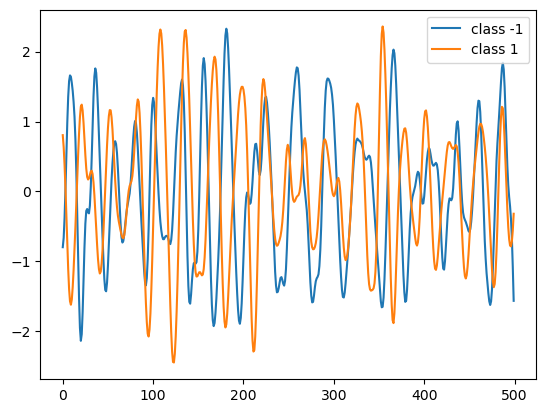

In [115]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))
print(classes)
plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [143]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [145]:
x_train.shape

(3601, 500, 1)

In [161]:
num_classes = len(np.unique(y_train))

In [163]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [169]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [213]:
def make_model_lstm(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    #embedding = tf.keras.layers.Embedding(input_dim=input_shape, output_dim=64)(input_layer)
    lstm = tf.keras.layers.LSTM(128)(input_layer)
    output_layer = tf.keras.layers.Dense(num_classes)(lstm)
    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
def make_model_rnn(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    #embedding = tf.keras.layers.Embedding(input_dim=input_shape, output_dim=64)(input_layer)
    lstm = tf.keras.layers.SimpleRNN(128)(input_layer)
    output_layer = tf.keras.layers.Dense(num_classes)(lstm)
    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [223]:
model = make_model_lstm(input_shape=x_train.shape[1:])
tf.keras.utils.plot_model(model, show_shapes=True)
model.summary()

You must install pydot (`pip install pydot`) for `plot_model` to work.


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 500, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,818 (261.01 KB)

 Trainable params: 66,818 (261.01 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
epochs = 500
batch_size = 32

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - loss: 1.3335 - sparse_categorical_accuracy: 0.4896 - val_loss: 0.9635 - val_sparse_categorical_accuracy: 0.4979 - learning_rate: 0.0010
Epoch 2/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 275ms/step - loss: 0.8218 - sparse_categorical_accuracy: 0.5051 - val_loss: 1.0268 - val_sparse_categorical_accuracy: 0.5187 - learning_rate: 0.0010
Epoch 3/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - loss: 0.7949 - sparse_categorical_accuracy: 0.4926 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.5187 - learning_rate: 0.0010
Epoch 4/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 218ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.4768 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.5187 - learning_rate: 0.0010
Epoch 5/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.4864 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.5187 - learning_rate: 0.0010
Epoch 6/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 2

In [219]:
model = tf.keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.4712
Test accuracy 0.4840908944606781
Test loss 0.6931474804878235


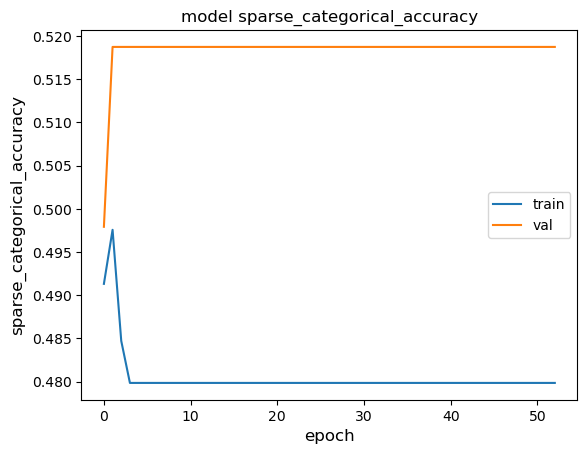

In [221]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()